[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/carlos-adir/UnB-Courses/blob/main/vibracoes/multi-dofs-system.ipynb)

In [65]:
try:
    import numpy as np
    from matplotlib import pyplot as plt 
    import scipy
except ModuleNotFoundError:
    import os
    os.system("pip install numpy")
    os.system("pip install matplotlib")
    os.system("pip install scipy")
    from matplotlib import pyplot as plt 
    from scipy.integrate import odeint

In [66]:
n = 2
m1, m2 = 100, 200
k1, k2 = 200, 550
M = [[m1, 0],
     [0, m2]]
K = [[k1+k2, -k2],
     [-k2, k2]]
C = [[1, 0],
     [-1, 2]]
C = 50*np.array(C)

In [67]:
# n = 2
# M = np.diag(np.random.rand(n))
# M = np.random.rand(n, n)
# M += np.transpose(M)
# C = 1*np.random.rand(n, n)
# K = np.random.rand(n, n)
# K += np.transpose(K)

# ms, Pms = np.linalg.eigh(M)
# ms = 1 + 9*np.random.rand(n)
# M = Pms @ np.diag(ms) @ Pms.T
# ks, Pks = np.linalg.eigh(K)
# ks = 1 + 9*np.random.rand(n)
# K = Pks @ np.diag(ks) @ Pks.T

In [68]:
M = np.array(M)
C = np.array(C)
K = np.array(K)
ms, _ = np.linalg.eigh(M)
cs, _ = np.linalg.eig(C)
ks, _ = np.linalg.eigh(K)
print("M = ")
print(M)
print("eigs = ", ms)
print("C = ")
print(C)
print("eigs = ", cs)
print("K = ")
print(K)
print("eigs = ", ks)

M = 
[[100   0]
 [  0 200]]
eigs =  [100. 200.]
C = 
[[ 50   0]
 [-50 100]]
eigs =  [100.  50.]
K = 
[[ 750 -550]
 [-550  550]]
eigs =  [  90.98300563 1209.01699437]


## Resolvendo de forma numerica

In [69]:
K = np.array(K, dtype="float64")
M = np.array(M, dtype="float64")
Z = np.zeros((n, n))
I = np.eye(n)
MI = np.linalg.solve(M, I)
MC = np.linalg.solve(M, C)
MK = np.linalg.solve(M, K)
A = np.block([[  Z,   I],
              [-MK, -MC]])
B = np.block([[Z],[MI]])


In [70]:
def Force(y: np.ndarray, t: float):
    Amp, w = 200, 3.1116
    Amp = 0
    F = np.zeros(n)
    F[1] = Amp*np.sin(w*t)
    return F

def dydt(y: np.ndarray, t: float):
    F = Force(y, t)
    return A @ y + B @ F

In [71]:
x0 = np.random.rand(n)  # Initial position for every body
dx0 = np.random.rand(n)  # Initial velocity for every body
x0 = [1, -0.3]
dx0 = [0, 0]
X0 = np.concatenate([x0, dx0])

In [72]:
t = np.arange(0, 40, 0.1)
X = scipy.integrate.odeint(dydt, X0, t)
x = X[:, :n].T
dx = X[:, n:].T

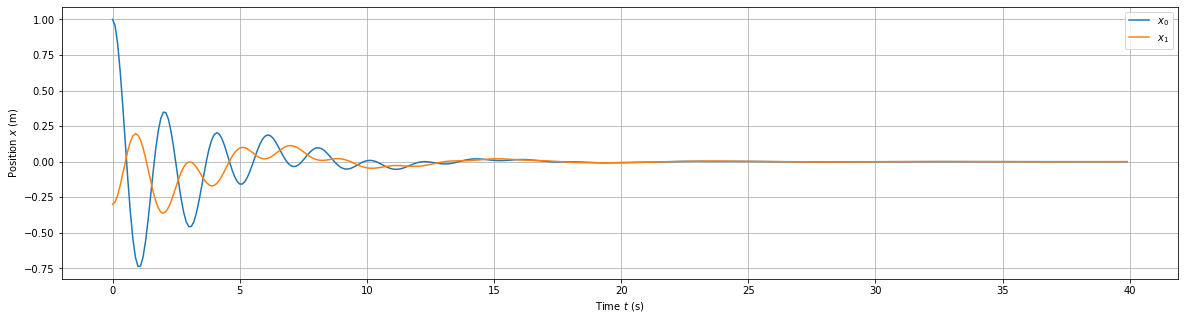

In [73]:
plt.figure(figsize=(20, 5))
for i in range(n):
    plt.plot(t, x[i], label=f"$x_{i}$")
plt.legend()
plt.xlabel("Time $t$ (s)")
plt.ylabel("Position $x$ (m)")
plt.grid()

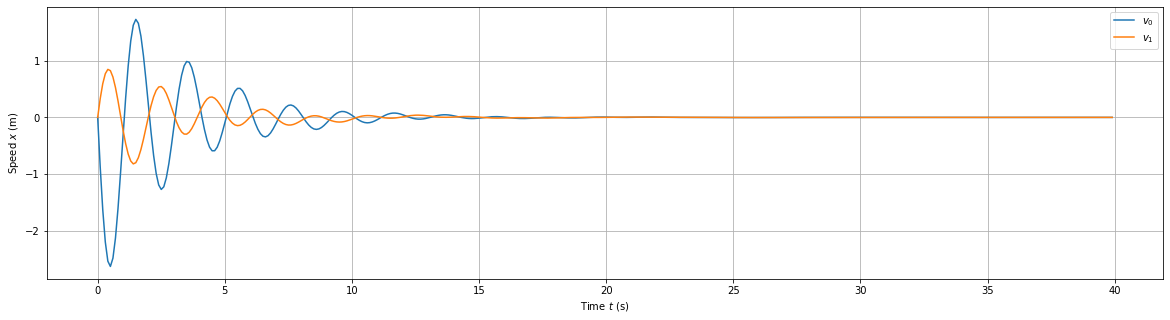

In [74]:
plt.figure(figsize=(20, 5))
for i in range(n):
    plt.plot(t, dx[i], label=f"$v_{i}$")
plt.legend()
plt.xlabel("Time $t$ (s)")
plt.ylabel("Speed $x$ (m)")
plt.grid()

Sample rate = 10.000000 Hz
   Duration = 39.900000 s


(0.0, 1.0)

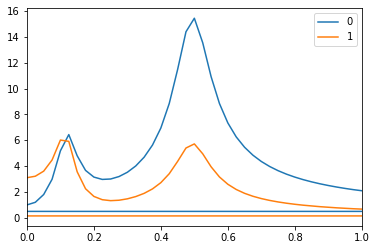

In [84]:
SAMPLE_RATE = 1/(t[1]-t[0])
DURATION = t[-1]
N = int(SAMPLE_RATE * DURATION)+1
print("Sample rate = %.6f Hz" % SAMPLE_RATE)
print("   Duration = %.6f s" % DURATION)
xf = scipy.fft.fftfreq(N, 1/SAMPLE_RATE)
for i in range(n):
    yf = scipy.fft.fft(x[i])
    plt.plot(xf, np.abs(yf), label="%d"%i)
    plt.legend()
plt.xlim(0, 1)

## Usando coordenadas modais

In [76]:
def get_amortcoefs(M: np.ndarray, C: np.ndarray, K: np.ndarray):
    n = M.shape[0]
    lams, B = scipy.linalg.eigh(K, M)
    wns = np.sqrt(lams)
    MC = np.linalg.solve(M, C)
    MK = np.linalg.solve(M, K)
    Z = np.zeros((n, n))
    I = np.eye(n)
    A = np.block([[  Z,   I],
                  [-MK, -MC]])
    eigvals, eigvecs = np.linalg.eig(A)
    modeigs = np.abs(eigvals)
    xis = np.zeros(len(wns), dtype="object")
    for i, wn in enumerate(wns):
        diff = np.abs(modeigs - wn)
        index = np.where(diff == np.min(diff))[0][0]
        xis[i] = np.abs(np.real(eigvals[index])/wn)
    return xis, wns, B

In [77]:
xis, wns, B = get_amortcoefs(M, C, K)
ms, Pm = np.linalg.eigh(M)
ks = ms*wns**2
cs = 2*xis*np.sqrt(ms*ks)

print("ms = ", ms)
print("cs = ", cs)
print("ks = ", ks)
print("wns = ", wns)
print("    = ", np.sqrt(ks/ms))
print("xis = ", xis)
print("    = ", cs/np.sqrt(4*ks*ms))

ms =  [100. 200.]
cs =  [34.82990784712973 130.3401843057407]
ks =  [  56.80684666 1936.38630668]
wns =  [0.75370317 3.11158023]
    =  [0.75370317 3.11158023]
xis =  [0.2310585207176254 0.1047218572503468]
    =  [0.23105852071762537 0.1047218572503468]


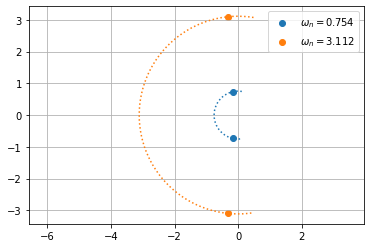

In [78]:
theta = np.linspace(np.pi/2-np.pi/20, 1.5*np.pi+np.pi/20, 129)
for xi, wn in zip(xis, wns):
    mu = np.sqrt(1-xi**2)
    plt.plot(wn*np.cos(theta), wn*np.sin(theta), ls="dotted")
    plt.scatter( (-wn*xi, -wn*xi), (mu*wn, -mu*wn), label=r"$\omega_n=%.3f$"%wn)
    
plt.axis("equal")
plt.grid()
plt.legend()
plt.show()

In [79]:
y0 = B.T @ M @ x0
dy0 = B.T @ M @ dx0
print(" y0 = ", y0)
print("dy0 = ", dy0)

 y0 =  [ -1.19284476 -10.79708856]
dy0 =  [0. 0.]


A solucao para cada modo é dado por

$$
y(t) = y_0 \cdot y_{pos}(t) + \dot{y}_0 \cdot y_{vel}(t)
$$

Onde

$$
y_{pos}(t) = \exp \left(-\xi \omega_n t\right) \cdot \left[ \cos \mu \omega_n t + \dfrac{\xi}{\mu} \cdot \sin \mu \omega_n t\right]
$$
$$
y_{vel}(t) = \exp \left(-\xi \omega_n t\right)\cdot \dfrac{1}{\mu \omega_n} \cdot \sin \mu \omega_n t
$$


In [80]:
Y = np.zeros((n, len(t)))

for i, (xi, wn) in enumerate(zip(xis, wns)):
    mu = np.sqrt(1-xi**2)
    ypos = np.exp(-xi*wn*t)*(np.cos(mu*wn*t) + (xi/mu)*np.sin(mu*wn*t))
    yvel = np.exp(-xi*wn*t)*np.sin(mu*wn*t)/(mu*wn)
    Y[i] += y0[i] * ypos + dy0[i] * yvel

Y.shape =  (2, 400)
B.shape =  (2, 2)


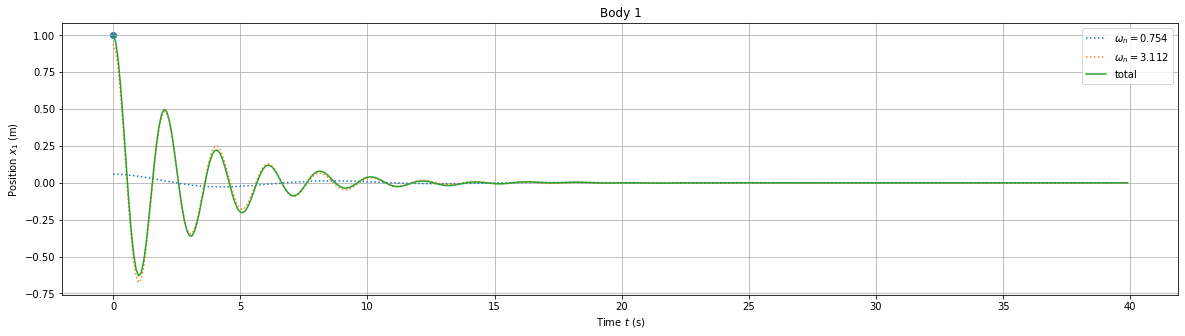

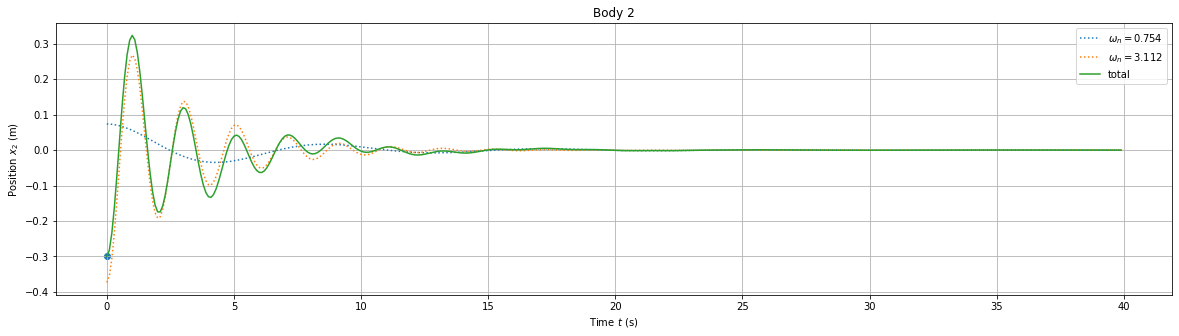

In [81]:
print("Y.shape = ", Y.shape)
print("B.shape = ", B.shape)
for i in range(n):
    plt.figure(figsize=(20, 5))
    for j, wn in enumerate(wns):
        pos = B[i, j] * Y[j]
        plt.plot(t, pos, ls="dotted", label=r"$\omega_n=%.3f$"%wn)
    pos = B[i, :] @ Y
    plt.plot(t, pos, label="total")
    plt.scatter(0, x0[i])
    plt.title(r"Body %d" % (i+1))
    plt.legend()
    plt.grid()
    plt.xlabel(r"Time $t$ (s)")
    plt.ylabel(r"Position $x_{%d}$ (m)"%(i+1))

Text(0, 0.5, 'Position $x$ (m)')

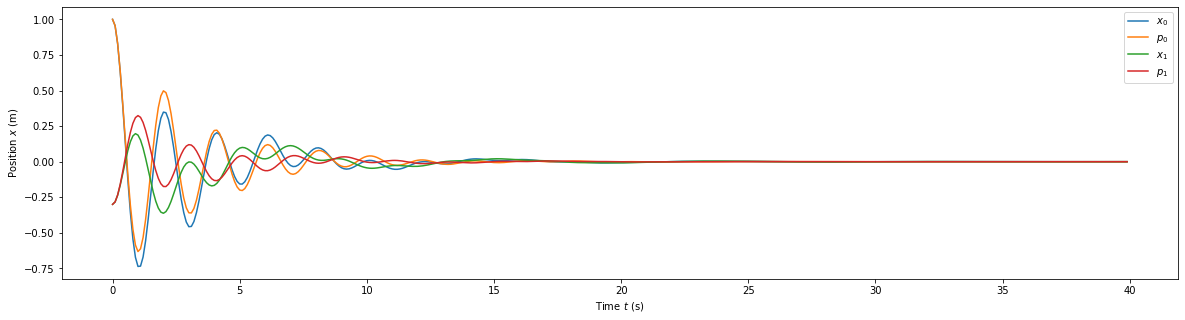

In [82]:
plt.figure(figsize=(20, 5))
for i in range(n):
    pos = B @ Y
    plt.plot(t, x[i], label=f"$x_{i}$")
    plt.plot(t, pos[i], label=f"$p_{i}$")
plt.legend()
plt.xlabel("Time $t$ (s)")
plt.ylabel("Position $x$ (m)")